# MGL EFIS Plotter with pandas

Start by importing the MglEfisPlotter code.

working through http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
# Either update your PYTHONPATH to include your project directory or uncomment the next two lines
# import sys
# sys.path.append('..')

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MglEfisPlotter import *

In [3]:
plt.rcParams['figure.figsize'] = (12, 8)

Load some flights from the sample `IEFISBB.DAT` file.

In [4]:
datafile = '../data/IEFISBB.DAT'
minTimestamp = 429600874
maxTimestamp = 1000000000

flights = createFlights(datafile, minTimestamp, maxTimestamp)
f = flights[-1]
print(f)

Flight at 2019-02-13 14:14:21-14:29:57,  3903 messages, 479912852-479913848


In [5]:
rpm = pd.DataFrame(f.listData('rpm'))
rpm.head()

,minutes,rpm
0,0.000000,2890
1,0.000000,2890
2,0.066667,2932
3,0.066667,2950
4,0.066667,2932


In [6]:
palt = pd.DataFrame(f.listData('pAltitude'))
palt.head()

,minutes,pAltitude
0,0.000000,405
1,0.000000,405
2,0.066667,430
3,0.066667,454
4,0.066667,454


Index(['minutes', 'pAltitude', 'rpm'], dtype='object')


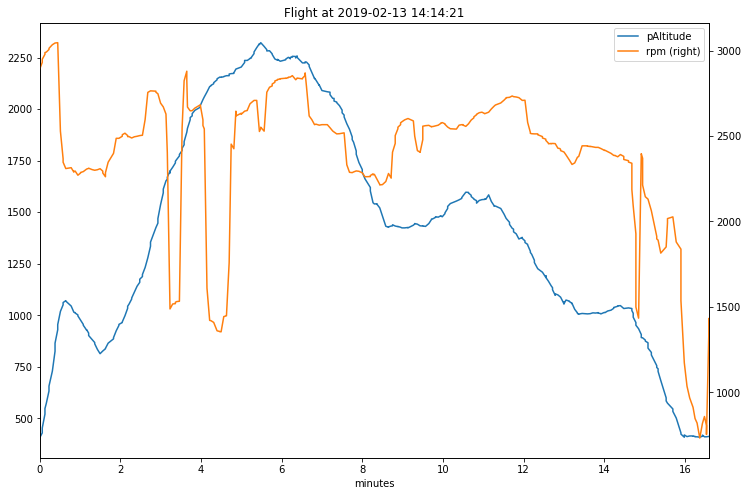

In [7]:
m = palt.merge(rpm)
print(m.columns)
m.plot(x='minutes', secondary_y='rpm', title=f.title())

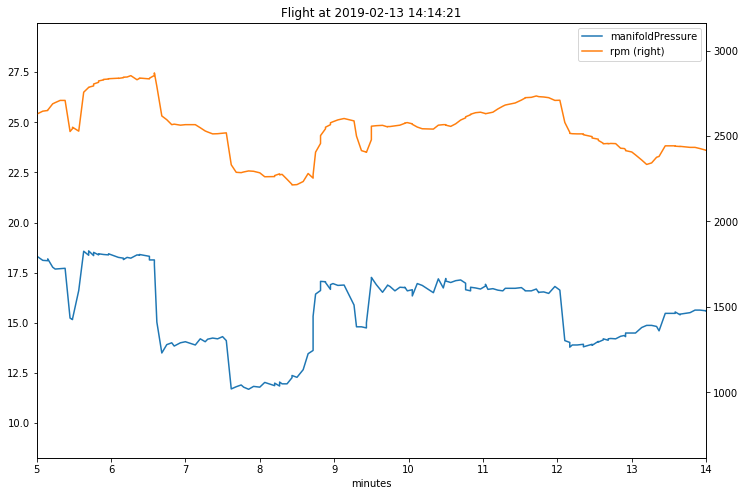

In [8]:
manpress = pd.DataFrame(f.listData('manifoldPressure'))
rpm = pd.DataFrame(f.listData('rpm'))
mr = manpress.merge(rpm)
mr.plot(x='minutes', secondary_y='rpm', xlim=(5,14), title=f.title())

Text(0, 0.5, 'degrees F')

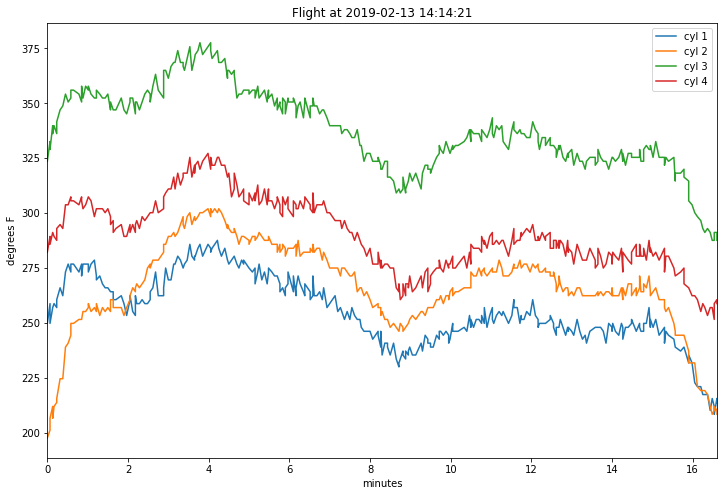

In [9]:
cht = f.listData('cht')
cht = pd.DataFrame(cht['cht'], index=cht['minutes'], columns=('cyl 1', 'cyl 2', 'cyl 3', 'cyl 4'))
ax = cht.plot(title=f.title())
ax.set_xlabel('minutes')
ax.set_ylabel('degrees F')

In [10]:
meanCht = pd.DataFrame(cht.T.mean().T, columns=['cht'])

In [11]:
egt = f.listData('egt')
egt = pd.DataFrame(egt['egt'], index=egt['minutes'], columns=['c1', 'c2', 'c3', 'c4'])
print(egt.columns)
meanEgt = pd.DataFrame(egt.T.mean().T, columns=['egt'])

Index(['c1', 'c2', 'c3', 'c4'], dtype='object')


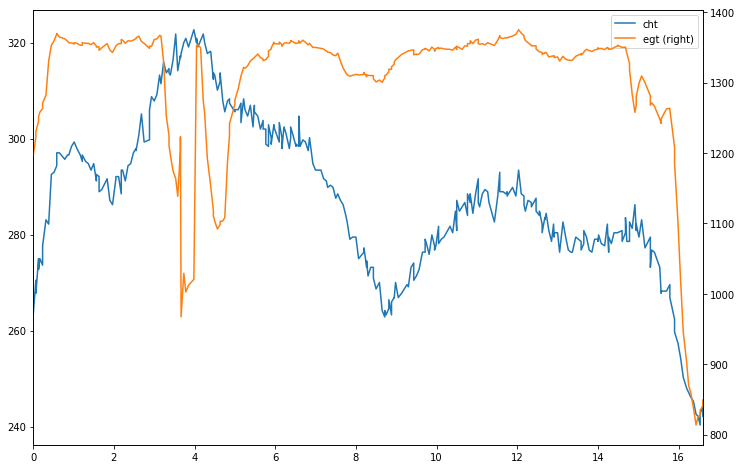

In [12]:
t = meanCht.merge(meanEgt, left_index=True, right_index=True)
t.plot(y=['cht', 'egt'], secondary_y='egt')

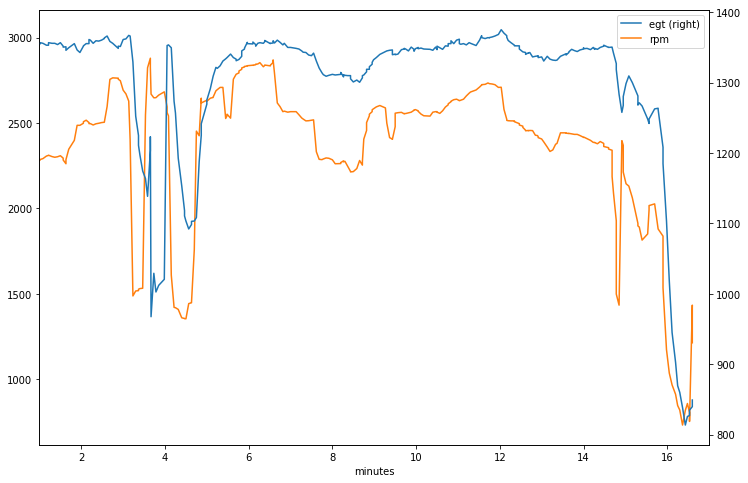

In [13]:
t = meanEgt.merge(rpm, left_index=True, right_on='minutes')
t.plot(x='minutes', secondary_y='egt', xlim=(1, 17))

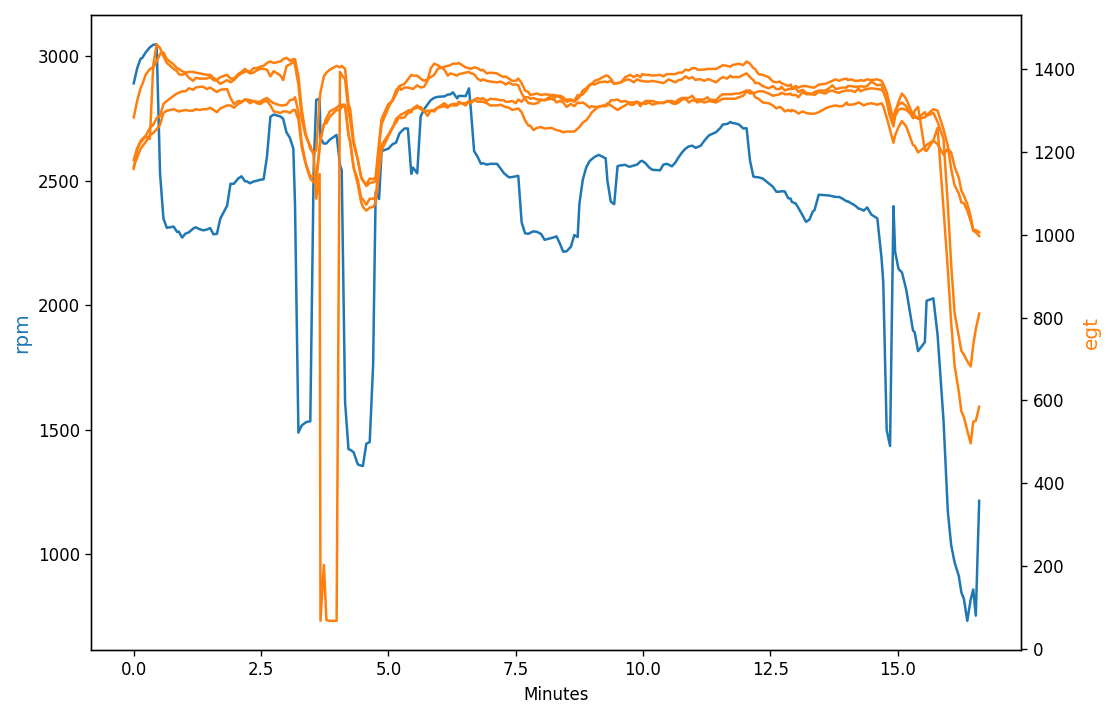

In [14]:
p = Plot(f)
p.plot2(['rpm', 'egt'])